# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gzip
import datetime

import folium

from urllib.request import urlopen
from xmltodict import parse
from zipfile import ZipFile
from io import BytesIO
from scipy import stats

## Question 1

Use [World Bank's Data Service](https://data.worldbank.org/) to retrieve

* Literacy rates of women (percentage of females ages 15 and above)
* Child mortality rate, under 5 year old. (per 1,000 live births)
* Gini index (Economic Inequality)

1. Plot each dataset for Turkey from earliest date available until this year.
2. Plot the same data for Greece, Bulgaria, Romania, Poland, Syria and Iran for the same periods. 
3. Do a scatter plot of female literacy rate against child mortality rate for Turkey. Do you see a relation? Which direction do you think the relation works?
4. Do a scatter plot of female literacy rate against gini index for Turkey. Do you see a relation? Which direction do you think the relation works?
5. Do a scatter plot of child mortality rate against the gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

In [2]:
def read_data(url,zip_name):
    
    with urlopen(url) as url:
         zfile = ZipFile(BytesIO(url.read()))
         print(zfile.filelist)
         data = parse(zfile.open(zip_name).read())
   
    a= [{x['@name']: x['#text'] for x in y['field'] if '#text' in x.keys()} for y in data['Root']['data']['record']]
    df=pd.DataFrame.from_dict(a)
    return df

In [3]:
def plot_data(x,y):
    plt.figure(figsize=(26,4))
    plt.plot(x,y,color='green', marker='o',linewidth=2, markersize=9)
    plt.xticks(rotation=45)

    

In [4]:
liter_url='https://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.FE.ZS?downloadformat=xml'
liter_zip='API_SE.ADT.LITR.FE.ZS_DS2_en_xml_v2_4651512.xml'

mortal_url='https://api.worldbank.org/v2/en/indicator/SH.DYN.MORT?downloadformat=xml'
mortal_zip='API_SH.DYN.MORT_DS2_en_xml_v2_4639508.xml'

gini_url='https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=xml'
gini_zip='API_SI.POV.GINI_DS2_en_xml_v2_4639705.xml'

df_lit=read_data(liter_url,liter_zip)
df_mortal=read_data(mortal_url,mortal_zip)
df_gini=read_data(gini_url,gini_zip)

[<ZipInfo filename='API_SE.ADT.LITR.FE.ZS_DS2_en_xml_v2_4651512.xml' compress_type=deflate file_size=4768054 compress_size=104459>]
[<ZipInfo filename='API_SH.DYN.MORT_DS2_en_xml_v2_4639508.xml' compress_type=deflate file_size=4533211 compress_size=119924>]
[<ZipInfo filename='API_SI.POV.GINI_DS2_en_xml_v2_4639705.xml' compress_type=deflate file_size=3806005 compress_size=72157>]


In [5]:
df_mortal

,Country or Area,Item,Year,Value
0,Aruba,"Mortality rate, under-5 (per 1,000 live births)",1960,NaN
1,Aruba,"Mortality rate, under-5 (per 1,000 live births)",1961,NaN
2,Aruba,"Mortality rate, under-5 (per 1,000 live births)",1962,NaN
3,Aruba,"Mortality rate, under-5 (per 1,000 live births)",1963,NaN
4,Aruba,"Mortality rate, under-5 (per 1,000 live births)",1964,NaN
...,...,...,...,...
16487,Zimbabwe,"Mortality rate, under-5 (per 1,000 live births)",2017,57
16488,Zimbabwe,"Mortality rate, under-5 (per 1,000 live births)",2018,54.8
16489,Zimbabwe,"Mortality rate, under-5 (per 1,000 live births)",2019,54.2
16490,Zimbabwe,"Mortality rate, under-5 (per 1,000 live births)",2020,53.9


In [6]:
df_lit.isnull().sum()

Country or Area        0
Item                   0
Year                   0
Value              13889
dtype: int64

In [7]:
turkey_lit=df_lit[df_lit["Country or Area"]=="Turkiye"]
turkey_mortal=df_mortal[df_mortal["Country or Area"]=="Turkiye"]
turkey_gini=df_gini[df_gini["Country or Area"]=="Turkiye"]

In [8]:
turkey_lit

,Country or Area,Item,Year,Value
15128,Turkiye,"Literacy rate, adult female (% of females ages...",1960,NaN
15129,Turkiye,"Literacy rate, adult female (% of females ages...",1961,NaN
15130,Turkiye,"Literacy rate, adult female (% of females ages...",1962,NaN
15131,Turkiye,"Literacy rate, adult female (% of females ages...",1963,NaN
15132,Turkiye,"Literacy rate, adult female (% of females ages...",1964,NaN
...,...,...,...,...
15185,Turkiye,"Literacy rate, adult female (% of females ages...",2017,93.4982681274414
15186,Turkiye,"Literacy rate, adult female (% of females ages...",2018,NaN
15187,Turkiye,"Literacy rate, adult female (% of females ages...",2019,94.4240417480469
15188,Turkiye,"Literacy rate, adult female (% of females ages...",2020,NaN


In [9]:
turkey_mortal.info() # we need to convert value column to numeric

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 15128 to 15189
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country or Area  62 non-null     object
 1   Item             62 non-null     object
 2   Year             62 non-null     object
 3   Value            61 non-null     object
dtypes: object(4)
memory usage: 2.4+ KB


In [10]:
turkey_mortal["Value"]=pd.to_numeric(turkey_mortal["Value"], downcast="float")

<ipython-input-10-c2639bb4a4cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey_mortal["Value"]=pd.to_numeric(turkey_mortal["Value"], downcast="float")


In [11]:
turkey_mortal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 15128 to 15189
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  62 non-null     object 
 1   Item             62 non-null     object 
 2   Year             62 non-null     object 
 3   Value            61 non-null     float32
dtypes: float32(1), object(3)
memory usage: 2.2+ KB


In [12]:
turkey_gini

,Country or Area,Item,Year,Value
15128,Turkiye,Gini index,1960,NaN
15129,Turkiye,Gini index,1961,NaN
15130,Turkiye,Gini index,1962,NaN
15131,Turkiye,Gini index,1963,NaN
15132,Turkiye,Gini index,1964,NaN
...,...,...,...,...
15185,Turkiye,Gini index,2017,41.4
15186,Turkiye,Gini index,2018,41.9
15187,Turkiye,Gini index,2019,41.9
15188,Turkiye,Gini index,2020,NaN


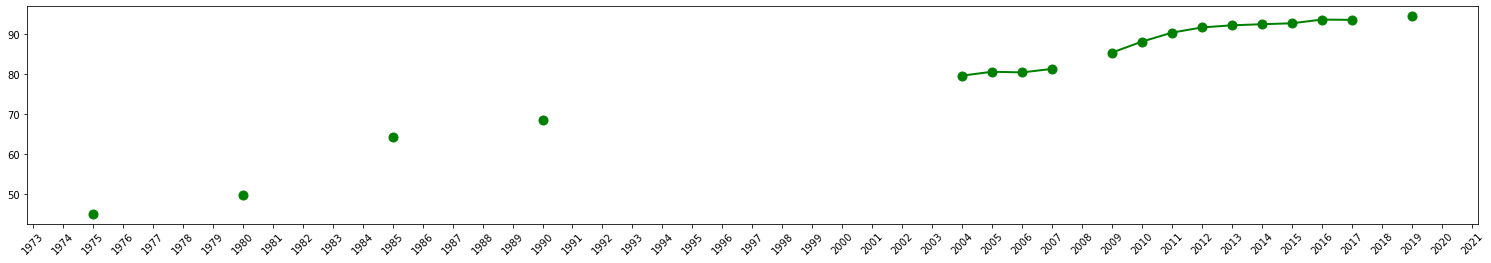

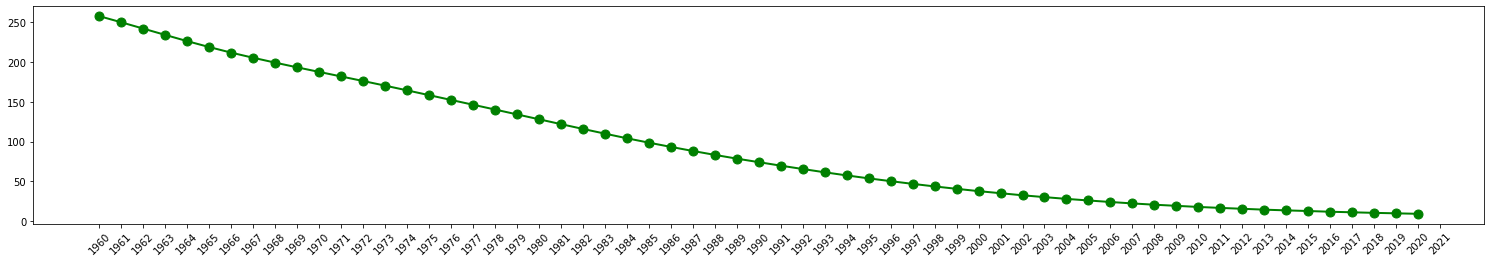

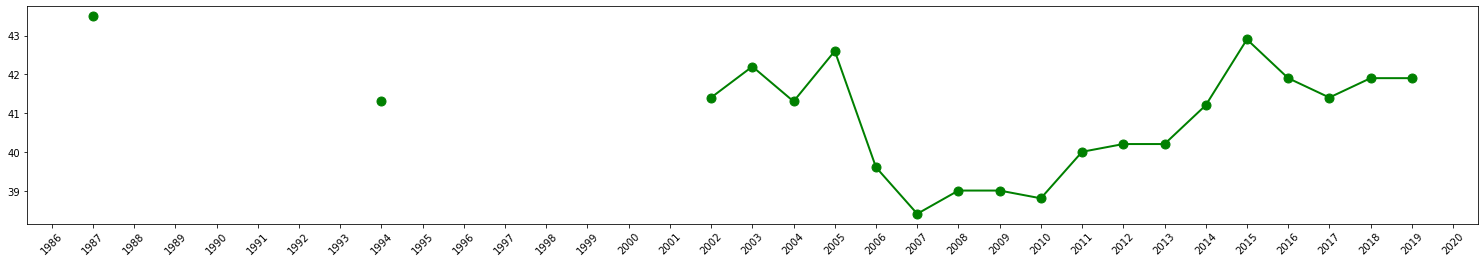

In [13]:
plot_data(turkey_lit["Year"],turkey_lit["Value"])
plot_data(turkey_mortal["Year"],turkey_mortal["Value"])
plot_data(turkey_gini["Year"],turkey_gini["Value"])

In [14]:
def plot_other_countries(x,y,name):
    
    plt.figure(figsize=(26,4))
    plt.plot(x,y,color='green', marker='o',linewidth=2, markersize=9)
    plt.title(name)
    plt.xticks(rotation=45)
    
    

In [15]:
turkey_gini=df_gini[df_gini["Country or Area"]=="Turkiye"]

In [16]:
countries=["Greece", "Bulgaria", "Romania", "Poland", "Syria","Iran"]

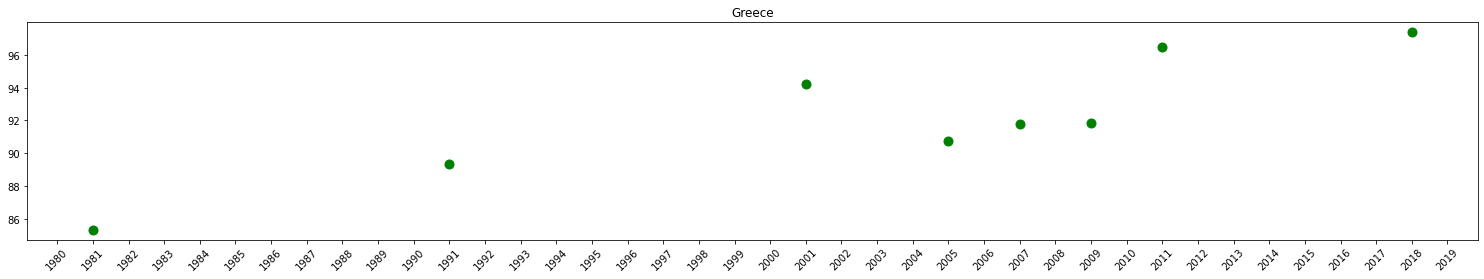

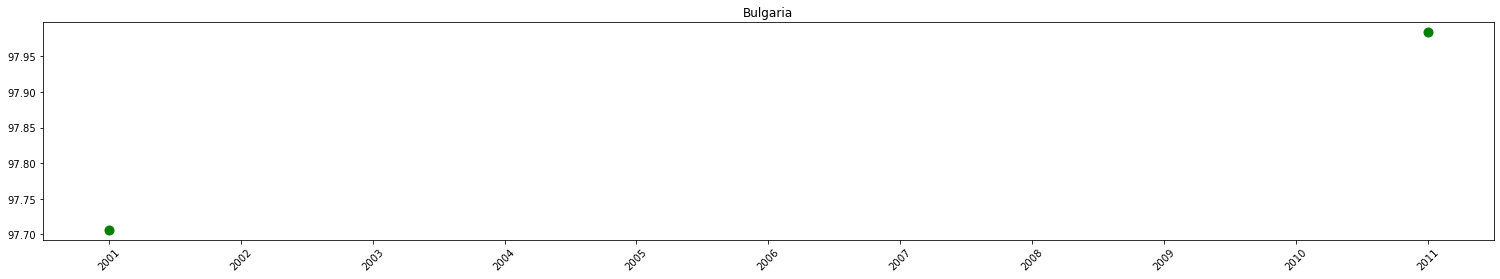

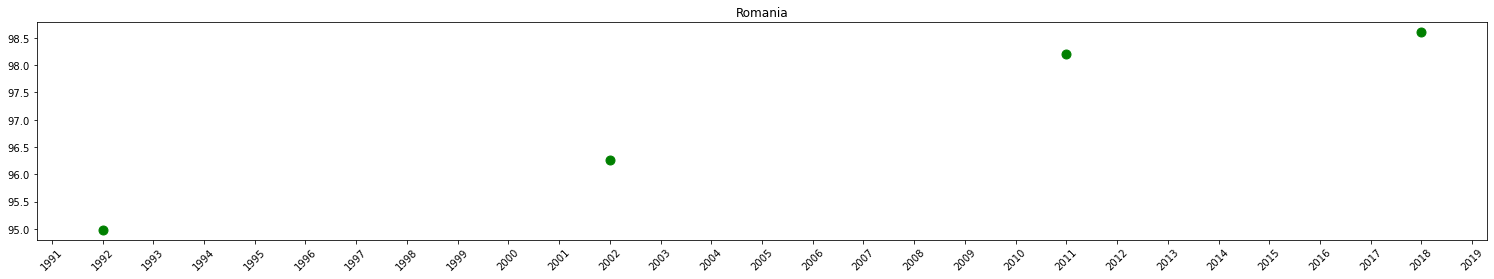

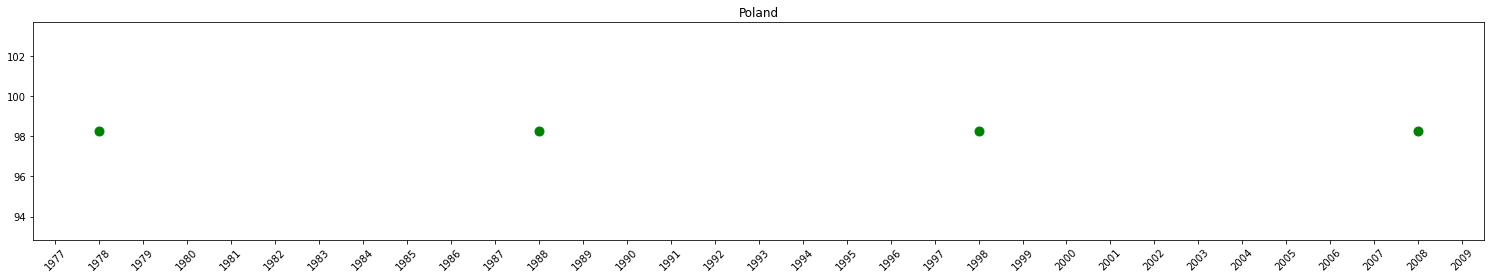

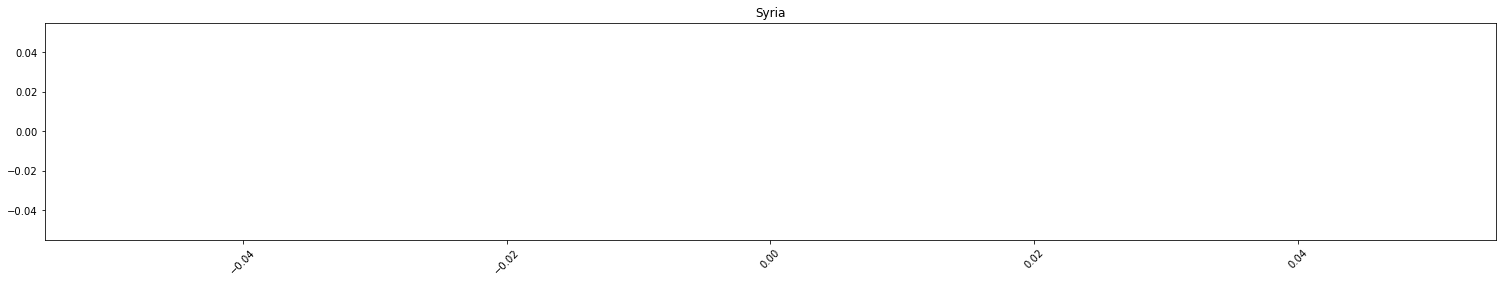

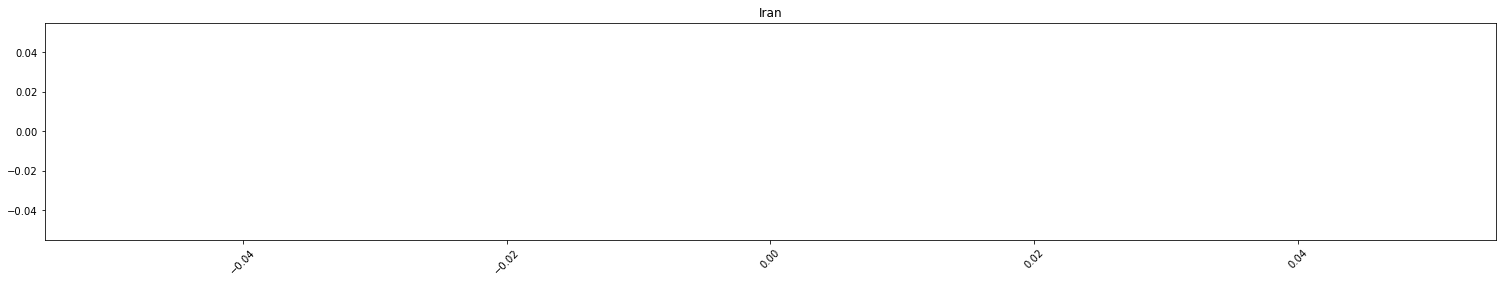

In [17]:
for i in countries:
    
    plot_other_countries(df_lit[df_lit["Country or Area"]==i]["Year"],df_lit[df_lit["Country or Area"]==i]["Value"],i)

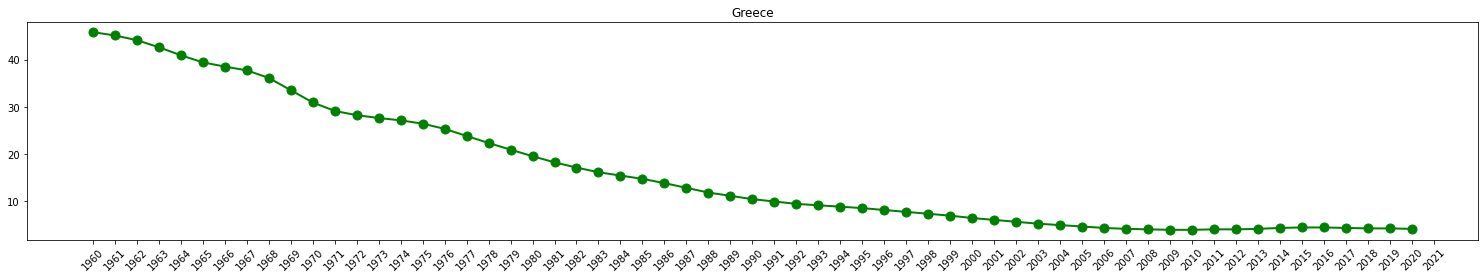

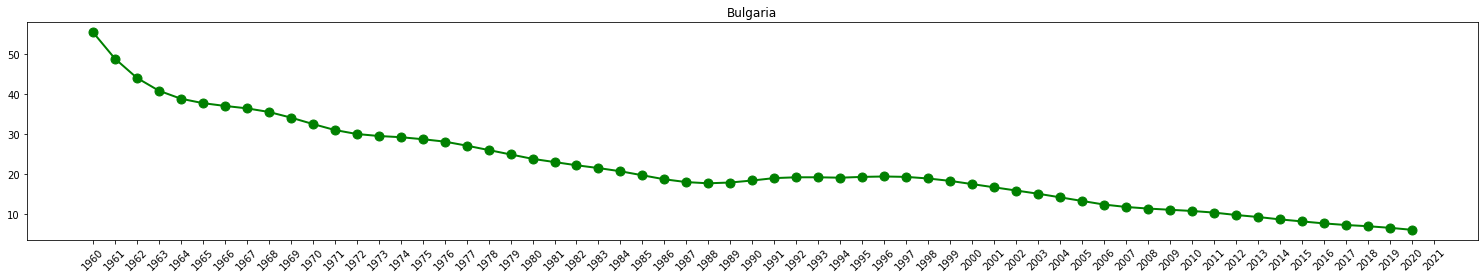

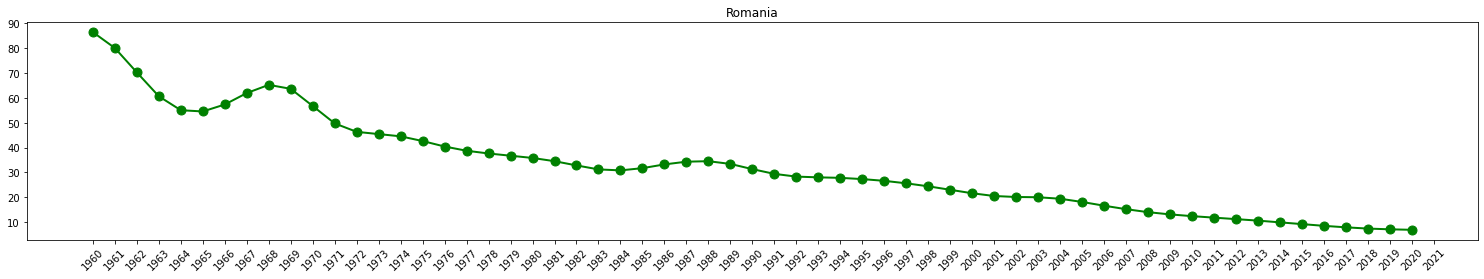

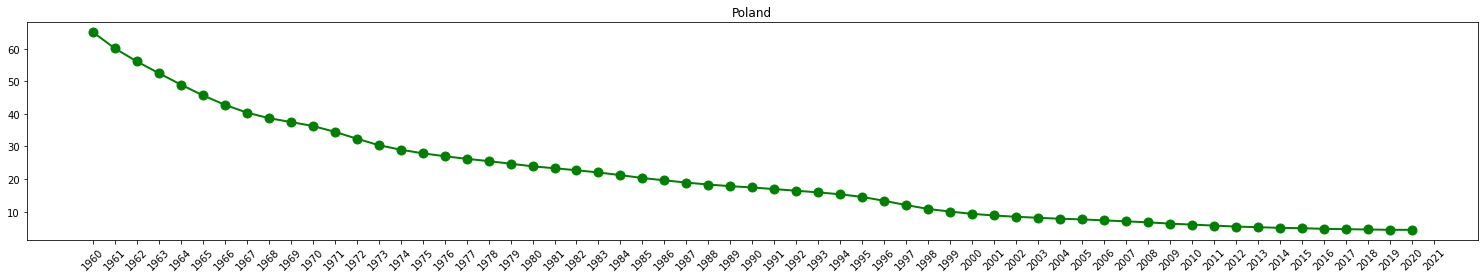

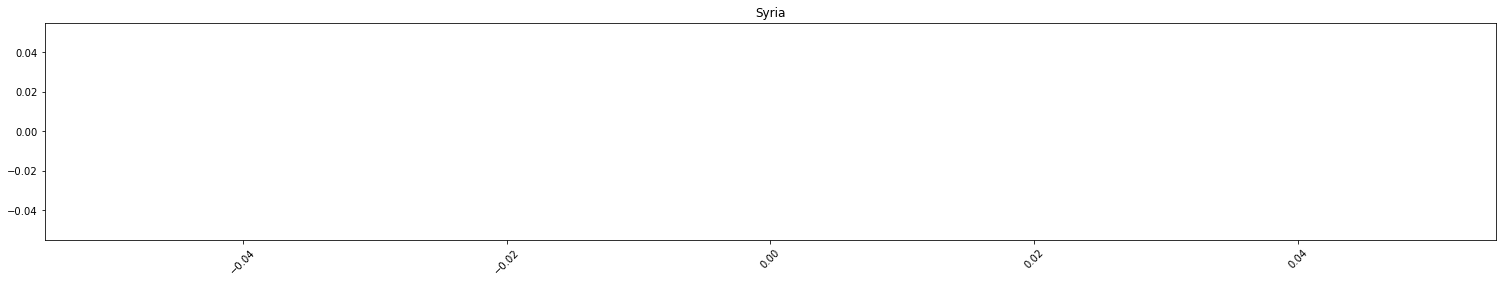

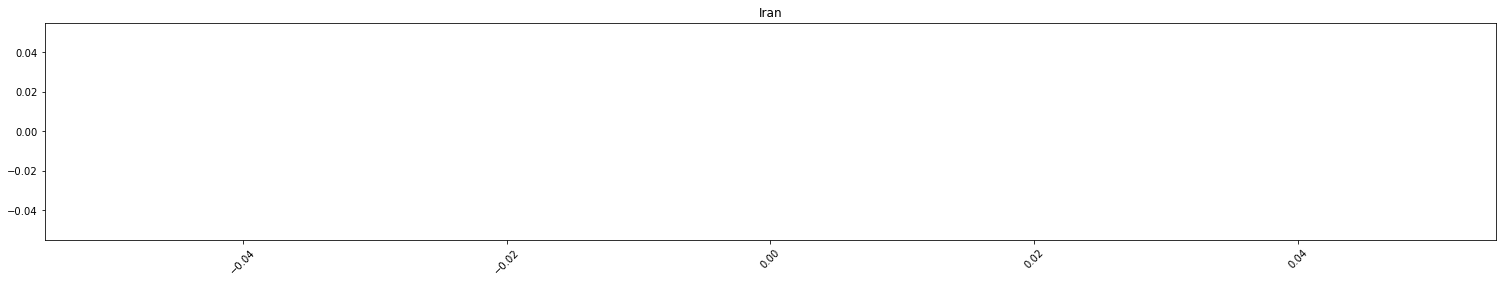

In [18]:
for i in countries:
    df_mortal["Value"]=pd.to_numeric(df_mortal["Value"], downcast="float")
    plot_other_countries(df_mortal[df_mortal["Country or Area"]==i]["Year"],df_mortal[df_lit["Country or Area"]==i]["Value"],i)

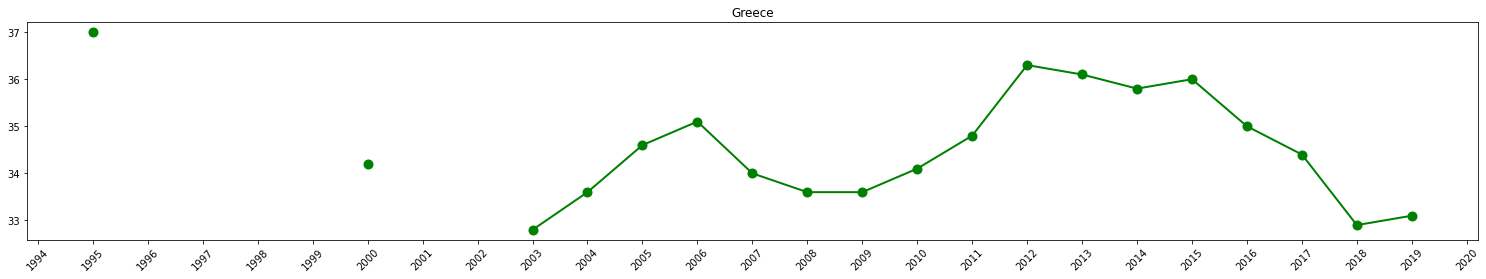

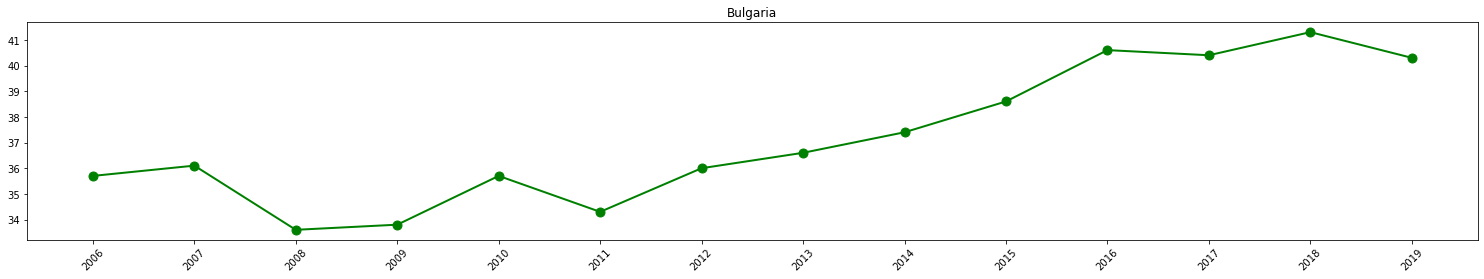

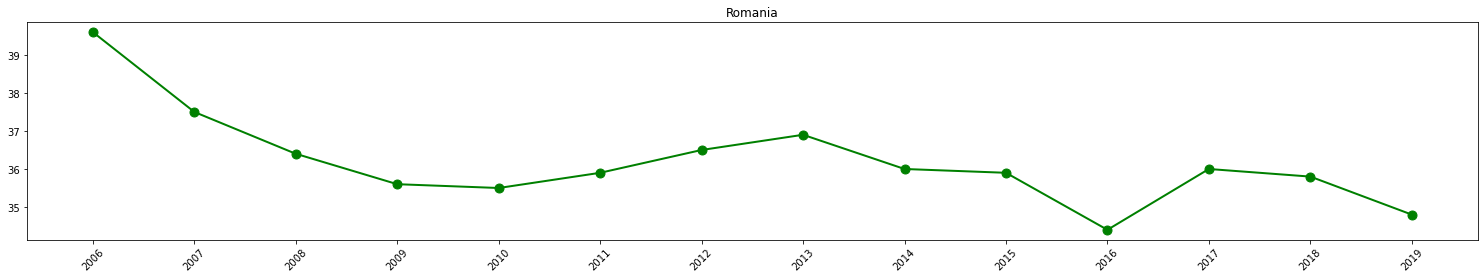

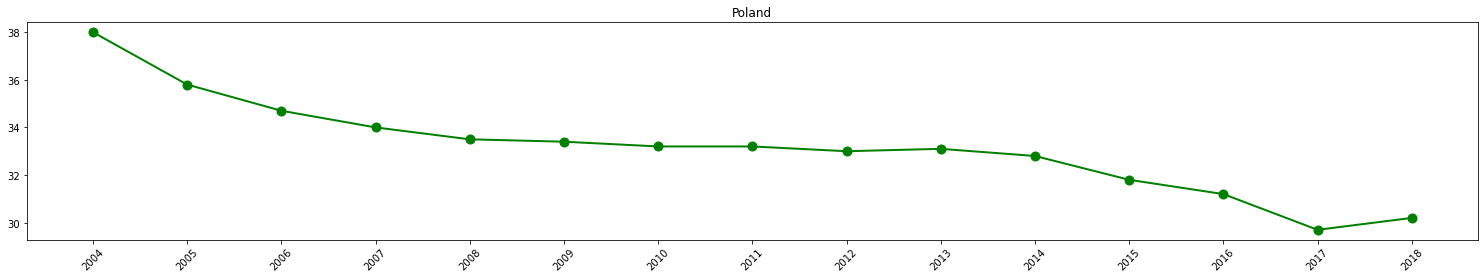

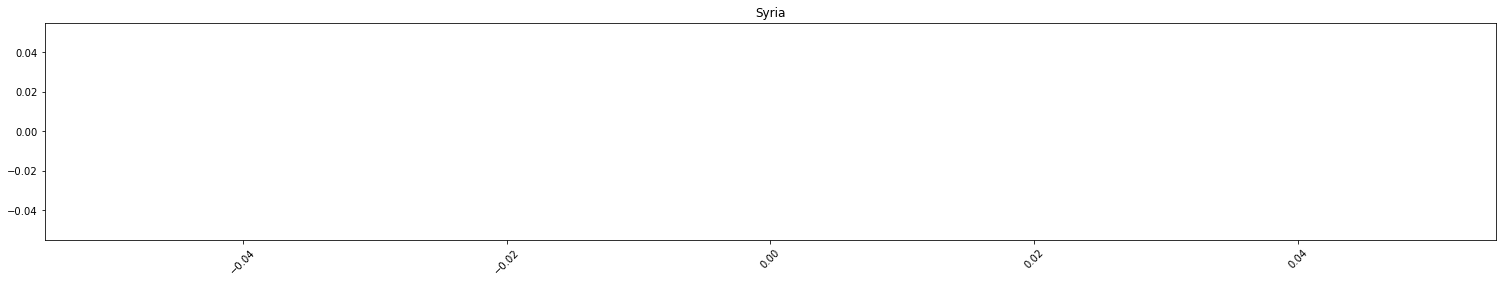

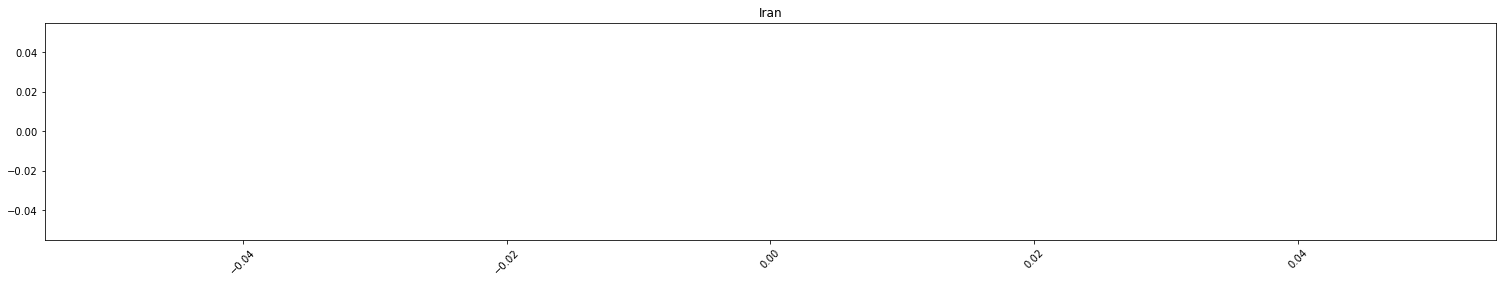

In [19]:
for i in countries:
    
    plot_other_countries(df_gini[df_gini["Country or Area"]==i]["Year"],df_gini[df_lit["Country or Area"]==i]["Value"],i)

In [20]:
def plot_scatter(x,y):
    plt.scatter(x,y)

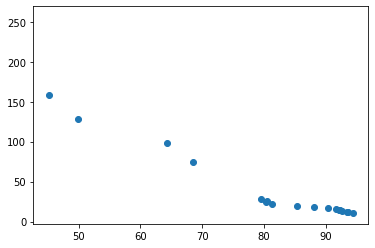

In [21]:
plot_scatter(turkey_lit["Value"],turkey_mortal["Value"])

As the literacy rate in women increased, child mortality decreased. They have an inverse relationship.

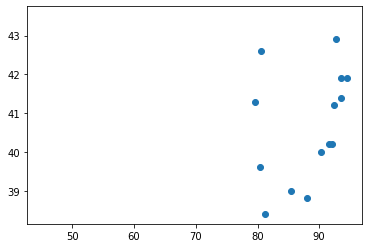

In [22]:
plot_scatter(turkey_lit["Value"],turkey_gini["Value"])

no relationship appears

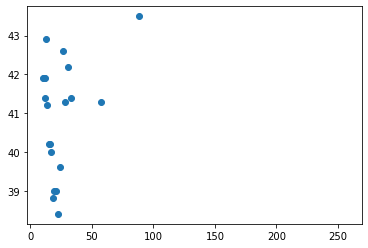

In [23]:
plot_scatter(turkey_mortal["Value"],turkey_gini["Value"])

no relationship appears

## Question 2

Use Istanbul Municipality Data Server to retrieve the data on [Rail Transportation Data](https://data.ibb.gov.tr/dataset/yas-grubuna-gore-rayli-sistemler-istasyon-bazli-yolcu-ve-yolculuk-sayilari).

1. Explore the dataset and explain each column.
2. Notice that the longitude and lattitude data is not recorded correctly. However, it is easy to correct the data. Explain how you would correct it and then write a function to correct it.
3. Notice that the passenger information is split according to age brackets. Find the total number of passengers for each station ~~in each month~~ and store it in a pandas dataframe. Then plot it on a map of Istanbul. Use disks of different sizes depending on the total number of passengers.
4. Write a function that accepts the age bracket as input (<20, 20-30, 30-60, 60+, unknown) and returns a probability an array of maps (dictionaries) of the form

    {Station Name: probability that the specific age bracket uses the station}
5. The return value for the function you wrote above is a probability distribution on the set of stations, i.e. the usage patterns of different age brackets. Figure out which stations are favored by each age bracket.
6. How do we check that the usage patterns for different age brackets are different? Use your idea to write a code to check for these differences.

In [24]:
with urlopen('https://data.ibb.gov.tr/dataset/d3df8db4-1ac6-4bfe-8896-7ec1159caa2b/resource/7aec630d-2757-4da0-97f1-71b140abd818/download/2021-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.xlsx') as url:
    data = pd.read_excel(url.read()) 

data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7.424,4.227,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,20-30
1,18.374,9.479,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,30-60
2,3.190,1.430,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,60+
3,949.000,469.000,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,<20
4,8.673,4.222,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9.295,8.209,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,20-30
17078,10.554,9.361,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,30-60
17079,1.552,1.235,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,60+
17080,3.319,2.632,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,<20


In [25]:
data.columns

Index(['passage_cnt', 'passanger_cnt', 'transaction_year', 'transaction_month',
       'line', 'station_name', 'station_number', 'town', 'latitude',
       'longitude', 'Age-Group'],
      dtype='object')

In [26]:
for i in data.columns:
    print(data[i].isnull().values.any(),i)

False passage_cnt
False passanger_cnt
False transaction_year
False transaction_month
False line
False station_name
True station_number
False town
True latitude
True longitude
False Age-Group


There are null values for 3 columns

In [27]:
data.duplicated().any()

False

In [28]:
[data[x].dtype for x in data.columns]

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O')]

In [29]:
data[["passage_cnt","passanger_cnt","transaction_year"]]=data[["passage_cnt","passanger_cnt","transaction_year"]].astype(str)

Values that should be int came as floats. Converted float numbers to strings and removed the dot. Then the columns were converted to integer format.

In [30]:
data["passage_cnt"]=data["passage_cnt"].str.replace(".","")
data["passanger_cnt"]=data["passanger_cnt"].str.replace(".","")
data["transaction_year"]=data["transaction_year"].str.replace(".","")

<ipython-input-30-c7bb994e1b81>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data["passage_cnt"]=data["passage_cnt"].str.replace(".","")
<ipython-input-30-c7bb994e1b81>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data["passanger_cnt"]=data["passanger_cnt"].str.replace(".","")
<ipython-input-30-c7bb994e1b81>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data["transaction_year"]=data["transaction_year"].str.replace(".","")


In [31]:
data["passage_cnt"]=data["passage_cnt"].astype(int)
data["passanger_cnt"]=data["passanger_cnt"].astype(int)
data["transaction_year"]=data["transaction_year"].astype(int)

In [32]:
data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7424,4227,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,20-30
1,18374,9479,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,30-60
2,319,143,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,60+
3,9490,4690,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,<20
4,8673,4222,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9295,8209,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,20-30
17078,10554,9361,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,30-60
17079,1552,1235,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,60+
17080,3319,2632,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,<20


passage_cnt(PASSAGE_COUNT) --> Number of daily passage on the rail system

passanger_cnt --> Number of daily passenger

transaction_year --> Year of measurement

transaction_month --> Month of measurement

line --> rail system line information

station_name -->  name of the station

station_number --> station number information ( There are na values.)

town --> district where the station located

latitude -->  latitude information ( There are na values and its format isn't correct.)

longitude -->  longitude information ( There are na values and its format isn't correct.)

Age-Group --> the age group information of the people 

In [33]:
data[["latitude","longitude"]]=data[["latitude","longitude"]].fillna(method="pad")

na values are filled with the fillna function.

In [34]:
data.latitude.unique(),data.longitude.unique()

(array([410340555555556, 4103675, 410284722222222, 410228055555556,
        410118333333333, 409913611111111, 410345, 409956666666667,
        409965833333333, 410341944444444, '41.02', 410179722222222,
        410375833333333, 410485, 410310555555556, 410425, 410073888888889,
        410400555555556, 410409166666667, 410305277777778, 410367777777778,
        410242222222222, 410051944444444, 4100175, 410857222222222,
        4111875, 411302222222222, 410689722222222, 411399722222222,
        410226944444444, 410759722222222, '[NULL]', 410540277777778,
        410942222222222, 411006666666667, 410371388888889, 410121666666667,
        411080833333333, 410287222222222, 410638888888889, 410974166666667,
        410318888888889, 410542777777778, 4110775, 410796111111111,
        410794722222222, 410881944444444, 410806111111111, 410404722222222,
        410745277777778, 410714444444444, 410645, 410025277777778,
        410021944444444, 409998888888889, 409645833333333, 409208888888889,
  

In [35]:
data.drop(data[data.latitude=='[NULL]'].index,inplace=True)
data.drop(data[data.longitude=='[NULL]'].index,inplace=True)
data.drop(data[data["longitude"]==datetime.datetime(2022, 9, 29, 0, 0)].index,inplace=True)

Null values and rows with irrelevant values are removed

In [36]:
data["latitude"]=pd.to_numeric(data["latitude"], downcast="float")
data["longitude"]=pd.to_numeric(data["longitude"], downcast="float") 

Relevant columns have been converted to float format.

In [37]:
[x for x in data["longitude"]]

[289920291700736.0,
 289920291700736.0,
 289920291700736.0,
 289920291700736.0,
 289920291700736.0,
 289864457125888.0,
 289864457125888.0,
 289864457125888.0,
 289864457125888.0,
 289864457125888.0,
 289864457125888.0,
 289864457125888.0,
 289864457125888.0,
 289864457125888.0,
 289864457125888.0,
 289741111033856.0,
 289741111033856.0,
 289741111033856.0,
 289741111033856.0,
 289741111033856.0,
 289740842598400.0,
 289740842598400.0,
 289740842598400.0,
 289740842598400.0,
 289740842598400.0,
 289478883147776.0,
 289478883147776.0,
 289478883147776.0,
 289478883147776.0,
 289478883147776.0,
 289478883147776.0,
 289478883147776.0,
 289478883147776.0,
 289478883147776.0,
 289478883147776.0,
 288458325098496.0,
 288458325098496.0,
 288458325098496.0,
 288458325098496.0,
 288458325098496.0,
 288565833498624.0,
 288565833498624.0,
 288565833498624.0,
 288565833498624.0,
 288565833498624.0,
 288635559608320.0,
 288635559608320.0,
 288635559608320.0,
 288635559608320.0,
 288635559608320.0,


In [38]:
data["latitude"]=[data["latitude"][x]/ (10**(len(str(data["latitude"][x]))-4)) for x in data["latitude"].index]
data["longitude"]=[data["longitude"][x]/ (10**(len(str(data["longitude"][x]))-4)) for x in data["longitude"].index]

The longitude and latitude columns must have 2 digits before the comma. I used comprehension to solve this problem.

First, I got the length of each value from the for loop in string format. I divided the values by 10^(x-4) because the float value contains ". and 0".

In [39]:
data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7424,4227,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034057,28.992029,20-30
1,18374,9479,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034057,28.992029,30-60
2,319,143,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034057,28.992029,60+
3,9490,4690,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034057,28.992029,<20
4,8673,4222,2021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034057,28.992029,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9295,8209,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053334,28.933557,20-30
17078,10554,9361,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053334,28.933557,30-60
17079,1552,1235,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053334,28.933557,60+
17080,3319,2632,2021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053334,28.933557,<20


In [40]:
df_map=data.groupby(["station_name","latitude","longitude"])["passanger_cnt"].sum().reset_index(name="sum")

In [41]:
df_map

,station_name,latitude,longitude,sum
0,4 Levent 2 Güney,41.085721,29.006860,780750
1,4 Levent Kuzey,41.085721,29.006860,1118407
2,AKSARAY,41.011834,28.947888,2261289
3,AKSARAY 1,41.011834,28.947888,682774
4,ALTINŞEHİR,41.016696,29.140112,446102
...,...,...,...,...
272,Şehitlik,41.034279,28.928333,1343899
273,Şişhane Güney,41.028722,28.974890,931234
274,Şişhane Kuzey,41.028722,28.974890,1303384
275,Şişli 2 Kuzey,41.063890,28.992140,3092158


In [42]:
istanbul_latitude = 41.015137 # Find the latitude of Istanbul
istanbul_longitude = 28.979530  # Find the longitude of Istanbul
zoom_start = 10  # Manually tweak the zoom parameter to see Istanbul
m = folium.Map(
            location=[istanbul_latitude,istanbul_longitude], # set the center location of the map
            zoom_start=zoom_start,
            tiles="CartoDB Positron"
        )

I used the folium library to draw maps.

In [43]:
m

In [44]:
for index,row in df_map.iterrows():
    folium.Circle(
    radius=row["sum"]/4000,
    location=[row["latitude"],row["longitude"]],
    color='crimson',
    fill=True,
    popup=row["station_name"]).add_to(m)
    

In [45]:
m

Different circles were drawn according to the number values.

In [46]:
df_prob=data.groupby(["station_name","Age-Group"])["passanger_cnt"].sum().reset_index()

In [47]:
Age_list=df_prob["Age-Group"].unique()

In [48]:
dicti={}
for i in Age_list:
    dicti[i]={}

A nested dictionary was created to print each age range to the same dictionary.

In [49]:
def calculate_prob(df,age,sum_all):
    for i in df["station_name"].unique():
        dicti[age][i]=df[df["station_name"]==i]["passanger_cnt"].values[0] / sum_all

Within the for loop, the number of passengers in the relevant age range at the relevant stop divided by the total number of passengers in that age range.

For example, Yenikapı_20-30 Age / total 20-30 Age

In [50]:
for i in Age_list:
    sum_all=df_prob[df_prob["Age-Group"]==i].passanger_cnt.sum()
    calculate_prob(df_prob[df_prob["Age-Group"]==i],i,sum_all)   

Inside the for loop, to the dataframe by each age range filter is given. In addition, the total number of passengers in this age range was found and sent to the function.

In [51]:
dicti

{'20-30': {'4 Levent 2 Güney': 0.004509133503431334,
  '4 Levent Kuzey': 0.0058207362139806595,
  'AKSARAY': 0.009357168194841158,
  'AKSARAY 1': 0.0032753227474579907,
  'ALTINŞEHİR': 0.0016543058163684292,
  'ATAKOY': 0.01470099949767529,
  'Acıbadem (Batı)': 0.0008623427523833898,
  'Acıbadem (Doğu)': 0.0010715071780798275,
  'Aksaray': 0.01113236910409486,
  'Akıncılar': 0.0015342948904228334,
  'Akşemsettin': 0.0043742685728991515,
  'Ali Fuat Başgil': 0.00425521549447154,
  'Alibeyköy': 0.0003486417604306058,
  'Alibeyköy Metro': 0.0010508618800383516,
  'Altunizade 1': 0.008169997244935816,
  'Altunizade 2': 0.002708394905736605,
  'Ataköy': 0.0013174382123511991,
  'Atalar': 0.0016645179445217075,
  'Atatürk Oto Sanayi Güney': 0.0013084344456821472,
  'Atatürk Oto Sanayi Kuzey': 0.0007901063134117161,
  'Atatürk Öğrenci Yurdu': 0.00846769625352532,
  'Aydıntepe': 0.0014518905316448652,
  'Ayrılıkçeşme': 0.01308910422218007,
  'Ayrılıkçeşmesi': 0.016036828382371787,
  'Ayvansara

In [52]:
for i,j in dicti.items():
    key_=list(j.keys())
    values_=list(j.values())
    
    position = values_.index(max(values_))
    print(key_[position] + " is the most preffered stop for passengers in the " + i + " age group." )

YENIKAPI is the most preffered stop for passengers in the 20-30 age group.
YENIKAPI is the most preffered stop for passengers in the 30-60 age group.
Eminönü 2 is the most preffered stop for passengers in the 60+ age group.
YENIKAPI is the most preffered stop for passengers in the <20 age group.
Taksim Güney is the most preffered stop for passengers in the Unknown age group.


# Question 3

For this question use Yahoo Finance API via [yfinance](https://pypi.org/project/yfinance/) library. Retrieve the data for Microsoft [MSFT], Apple [AAPL] and NASDAQ-100 [NDX]. from January 1, 2000.

1. Calculate the log of each series, and then calculate the first derivative of the result. What you got is called the [log-return](https://core.ac.uk/download/pdf/161062652.pdf) of each series. 
2. Merge the series you obtain in Step 1 into a single pandas dataframe.
3. Plot the histograms of results you obtained above (use 10 bins).
4. Plot all three series in a single plot to compare. Do you see a relationship? 
5. How do we see if there are any correlations between these series? What is the statistically correct way of testing it? Find the right statistical test and measure all three correlations.

In [53]:
import yfinance as yf

In [54]:
ndx = yf.Ticker("NDX")
aapl = yf.Ticker("AAPL")
msft = yf.Ticker("MSFT")

hist1 = ndx.history(start="2000-01-01")
hist2 = aapl.history(start="2000-01-01")
hist3 = msft.history(start="2000-01-01")


In [55]:
log1=np.log(hist1["Close"]).diff()
log2=np.log(hist2["Close"]).diff()
log3=np.log(hist3["Close"]).diff()




In [56]:
df_log = pd.concat([log1, log2, log3], axis=1)

In [57]:
df_log

,Close,Close,Close
Date,,,
2000-01-03 00:00:00-05:00,NaN,NaN,NaN
2000-01-04 00:00:00-05:00,-0.066635,-0.088078,-0.034364
2000-01-05 00:00:00-05:00,-0.011027,0.014527,0.010489
2000-01-06 00:00:00-05:00,-0.048636,-0.090514,-0.034072
2000-01-07 00:00:00-05:00,0.054971,0.046281,0.012983
...,...,...,...
2022-10-04 00:00:00-04:00,0.030934,0.025300,0.033253
2022-10-05 00:00:00-04:00,-0.000808,0.002051,0.001285
2022-10-06 00:00:00-04:00,-0.007605,-0.006648,-0.009718


(array([3.000e+00, 1.600e+01, 1.260e+02, 1.037e+03, 4.133e+03, 3.570e+02,
        4.400e+01, 1.000e+01, 1.000e+00, 1.000e+00]),
 array([-0.13003151, -0.09982539, -0.06961927, -0.03941315, -0.00920703,
         0.02099908,  0.0512052 ,  0.08141132,  0.11161744,  0.14182356,
         0.17202968]),
 <BarContainer object of 10 artists>)

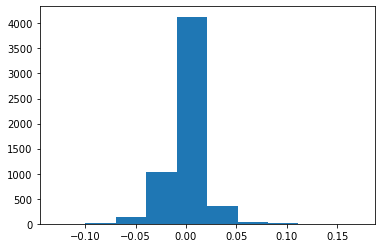

In [58]:
plt.hist(log1,bins=10)


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        7.000e+00, 2.130e+02, 5.297e+03, 2.110e+02]),
 array([-0.73124798, -0.64510376, -0.55895953, -0.47281531, -0.38667109,
        -0.30052687, -0.21438264, -0.12823842, -0.0420942 ,  0.04405002,
         0.13019425]),
 <BarContainer object of 10 artists>)

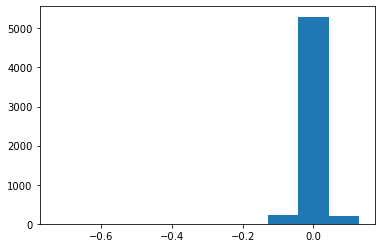

In [59]:
plt.hist(log2,bins=10)


(array([3.000e+00, 5.000e+00, 2.300e+01, 2.190e+02, 3.389e+03, 1.961e+03,
        1.110e+02, 1.400e+01, 2.000e+00, 2.000e+00]),
 array([-0.16957619, -0.13474942, -0.09992265, -0.06509588, -0.03026911,
         0.00455767,  0.03938444,  0.07421121,  0.10903798,  0.14386476,
         0.17869153]),
 <BarContainer object of 10 artists>)

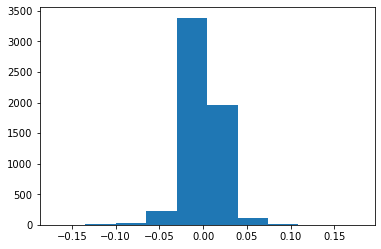

In [60]:
plt.hist(log3,bins=10)

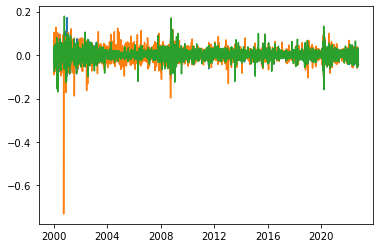

In [61]:
plt.plot(df_log["Close"])

I cannot understand relation. I'm not sure if I'm using the right function for the first derivative.